# Uniform-cost search (UCS) or Dijkstra algorithm

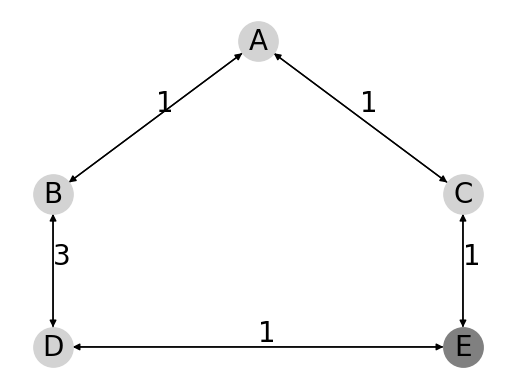

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D'],'C':['A','E'],'D':['B','E'],'E':['C','D']}
W={('A','B'): 1, ('A', 'C'): 4, ('B','A'): 1, ('B','D'): 1, ('C','A'): 4, ('C','E'): 1, ('C','A'): 1, ('D','B'): 3, ('D','E'): 1, ('E','C'): 1,  ('E','D'): 1}
nxG=nx.DiGraph(G)
nx.set_edge_attributes(nxG, values = W, name = 'weight')
source='A'
Target=['E']
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
nx.draw_networkx_edge_labels(G, pos=pos_nodes,edge_labels=weight,font_size=20,
  horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
nx.draw_networkx_nodes(nxG,pos=pos_nodes, nodelist=Target, node_color='gray', node_size=800)


## UCS algorithm
UCS(G,source)  
> Open = InitHeap(source,0)  
> Closed = $\emptyset$  
> while Open $\neq \emptyset$
>> s = Pop(Open)  
>> if Target(s) return s  
>> Closed = Closed $\cup$ $\{s\}$  
>> for n $\in$ Adjacents(G,s)  
>>>  $g_n$ = $g_s$ + $w(s,n)$  
>>>  if n $\notin$ Closed  
>>>>   if n $\notin$ Open  
>>>>>    Push(Open,n,$g_n$)  
>>>>   else  
>>>>>    Update(Open,n,$g_n$)  
>>>  else // n $\in$ Closed
>>>>   x = Closed[n]  
>>>>   if $g_n$ < x  
>>>>>    Delete(Closed[n])  
>>>>>    Push(Open,n,$g_n$)  
> return NULL

### BFS implementation returning the target node that was reached

In [2]:
import heapq
# G is a graph represented as an adjancency list. 
# source is the label (string) of the source node
# target is the list of target nodes
def ucs(G, W, source, Target):
  heapq.heappush(Openh,(0,source)); Opend={}; Opend[source]=0
  Closed={}
  while Open != []:
    (w,s) = heapq.heappop(Open); del Opend[s]
    if s in Target:
      return s
    Closed[s] = w
    for n in G[s]:
      gn = w + W[(s,n)]
      if n not in Closed:
        if n not in Opend:
          heapq.heappush(Openh,(gn,n)); Opend.update({n: gn})
        else
          ogn = Opend[n]
          if ogn > gn:
             heapq.heappush(Openh,(gn,n)); Opend[n]=ogn
          

  if source in Target: 
    return source
  # Open is a list of nodes to be visited. FIFO list of nodes
  Open = []; Open.append(source)
  # Closed is a list of visited nodes.  FIFO list of nodes
  Closed = []; 
	
  while Open != []:
    # Extract node from the the head of the Open list
    node = Open[0]; Open.pop(0)
    # Append node at the end of the Closed list
    Closed.append(node)
    # For each adjacent node
    for child in G[node]:
      if child not in Closed:
        if child not in Open:
          if child in Target: 
            return child
          Open.append(child)
				
				
print(bfs(G,source,Target))

D


### BFS implementation graphically showing the sequence of nodes visited

D


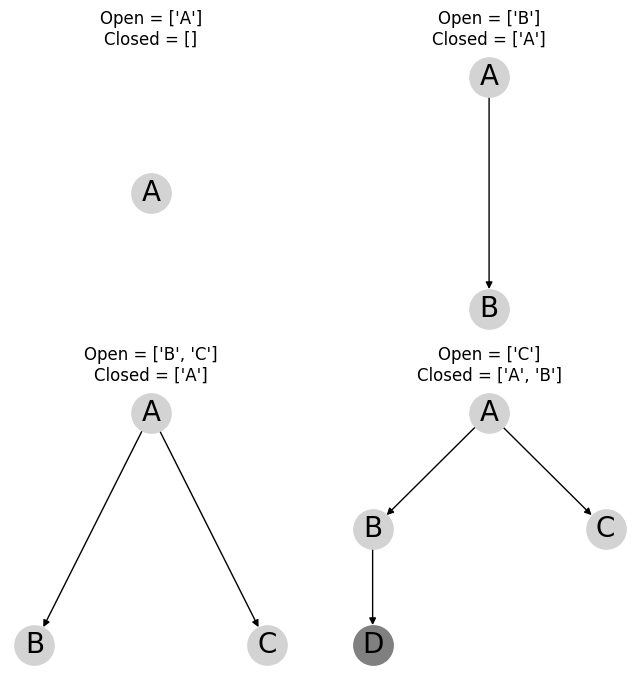

In [24]:
import matplotlib.pyplot as plt

nrows=2; ncols=2
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
axes = iter(fig.axes)

def draw_graph(DG, source, Open, Closed, target=[]):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  ax.set_title("Open = "+str(Open)+"\n"+"Closed = "+str(Closed))
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG,prog='dot',root=source)
  nx.draw(nxDG,pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, nodelist=target, node_color='gray', node_size=800)
  
# G is a graph represented as an adjancency list. 
# source is the label (string) of the source node
# target is the list of target nodes
def bfs(G, source, Target):
  if source in Target:
    return source
  # Open is a list of nodes to be visited. FIFO list of nodes
  Open = []; Open.append(source)
  # Closed is a list of visited nodes.  FIFO list of nodes
  Closed = []; 
  DG={source:[]}
  draw_graph(DG, source, Open, Closed)
  
  while Open != []:
    # Extract node from the the head of the Open list
    node = Open.pop(0)
    # Append node at the end of the Closed list
    Closed.append(node)
    Adj = DG[node]
    # For each adjacent node
    for child in G[node]:
      if child not in Closed:
        if child not in Open:
          Adj.append(child); DG[node]=Adj
          DG.update({child:[]})
          if child in Target:
            draw_graph(DG, source, Open, Closed, [child])
            return child
          Open.append(child)
          draw_graph(DG, source, Open, Closed)
          
				
print(bfs(G,source,Target))



BFS generates a tree search and depth $d$ equal to the shortest path to the solution  

BFS is complete, because it always find the solution, if exists  

BFS is optimal, that is, it finds the path with minimum cost, if actions (edge cost) have identical positive costs  

**Complexity**: G with branching factor $b$ and depth $d$ generating a complete tree
  
  $O(b^d)$ temporal and spatial cost, if target checked when node is generated
  
  $O(b^{d+1})$ temporal and spatial cost, if target checked when node is expanded
  
